# 4. Develop a function which can implement machine learning. (20)

def machine_learning (data, algorithm): 
.....

.....

plot ROC curve

return performance metrics

Function call: machine_learning (data, neural_network)

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import data

my_data = pd.read_csv("cancer.csv")

# Create features/inputs
X = my_data.drop(columns = ["Survival "])

# Create the output/class
y = my_data["Survival "]

# Splitting into training and testing datasets using KFold of 10 folds
kf = KFold()
KFold(n_splits=10)

for train_index, test_index in kf.split(my_data):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
my_data  

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [7]:
def logistic_regression(X_train, X_test, y_train, y_test):
    # Defining and training the model
    clf = LogisticRegression(solver = "newton-cg", penalty = "none", C = 100, random_state = 10).fit(X_train, y_train)

    # Evaluating the model 
    clf.score(X_test, y_test)

    # Making predictions
    y_pred = clf.predict(X_test)

    # Creating the labels
    labels = ["authentic", "forged"]
    return clf, y_pred

In [8]:
def random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
    rf.score(X_test, y_test)
    # Making predictions
    y_pred = rf.predict(X_test)
    return rf, y_pred

In [9]:
def support_vector_machine(X_train, X_test, y_train, y_test):
    svm = SVC(random_state = 0, kernel = "rbf", gamma = 100, C=0.1).fit(X_train, y_train)
    svm.score(X_test, y_test)
    y_pred = svm.predict(X_test)
    return svm, y_pred

In [10]:
def neural_network(X_train, X_test, y_train, y_test):
    nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    nn.score(X_test, y_test)
    y_pred = nn.predict(X_test)
    return nn, y_pred

In [13]:
# 4. Function to implement machine learning algorihtm
def machine_learning(data, algorithm):
    algo_response, pred = algorithm(X_train, X_test, y_train, y_test)
    
    # Developing the confusion matrix
    cm = confusion_matrix(y_test, pred, labels = algo_response.classes_)
    # Display Confusion Matrix
    print("          " + "Confusion Matrix for", algorithm.__name__)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Authentic", "Forged"])
    disp.plot()
    # Display ROC Curve
    plot_roc_curve(algo_response, X_test, y_test)
    plt.title('ROC Curve for {}'.format(algorithm.__name__))
    plt.show()
    return classification_report(y_test, pred)

          Confusion Matrix for logistic_regression


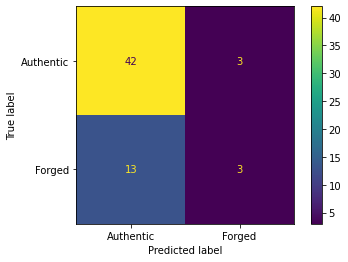

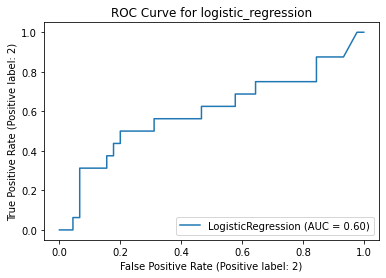

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



In [14]:
print(machine_learning(my_data, logistic_regression))

          Confusion Matrix for random_forest


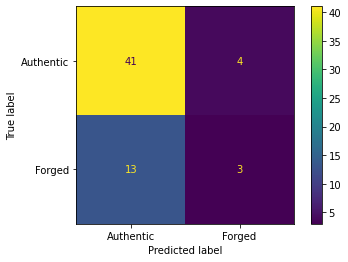

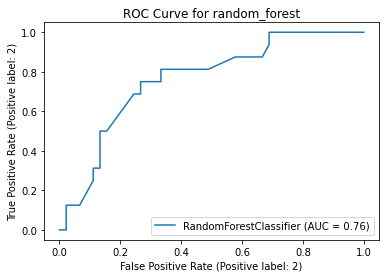

              precision    recall  f1-score   support

           1       0.76      0.91      0.83        45
           2       0.43      0.19      0.26        16

    accuracy                           0.72        61
   macro avg       0.59      0.55      0.54        61
weighted avg       0.67      0.72      0.68        61



In [15]:
print(machine_learning(my_data, random_forest))

          Confusion Matrix for support_vector_machine


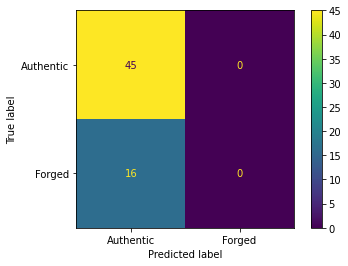

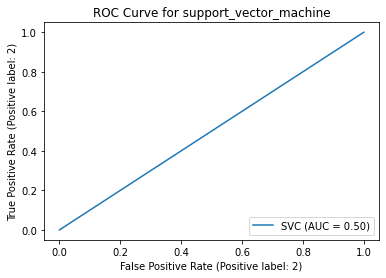

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        45
           2       0.00      0.00      0.00        16

    accuracy                           0.74        61
   macro avg       0.37      0.50      0.42        61
weighted avg       0.54      0.74      0.63        61



In [16]:
print(machine_learning(my_data, support_vector_machine))

          Confusion Matrix for neural_network


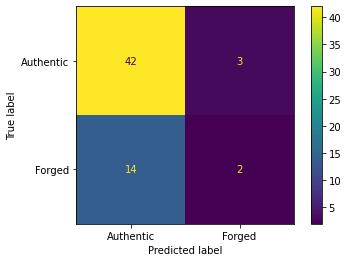

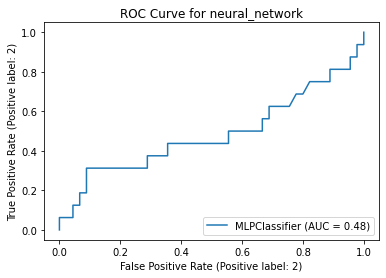

              precision    recall  f1-score   support

           1       0.75      0.93      0.83        45
           2       0.40      0.12      0.19        16

    accuracy                           0.72        61
   macro avg       0.57      0.53      0.51        61
weighted avg       0.66      0.72      0.66        61



In [17]:
print(machine_learning(my_data, neural_network))